![Image](./Airbnb_in_Porto.jpg)

### 1. Importing the data

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Importing the data into a dataframe
listings = pd.read_csv('listings.csv')

# Previewing to make sure data was imported correctly
display(listings.head())

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,41339,https://www.airbnb.com/rooms/41339,20250921034151,2025-09-21,city scrape,Porto city flat near the sea,Welcome to our apartment located near the sea ...,In the surrounds you have Serralves Museum and...,https://a0.muscache.com/pictures/miso/Hosting-...,180050,...,4.85,4.48,4.64,29049/AL,f,1,1,0,0,0.22
1,55111,https://www.airbnb.com/rooms/55111,20250921034151,2025-09-21,previous scrape,Fontielas Houses |Floor1 in House with shared ...,This complet apartment is the first floor in a...,NaN,https://a0.muscache.com/pictures/b3c38006-5fdf...,259711,...,4.90,4.80,4.80,7563/AL,f,3,3,0,0,0.17
2,73828,https://www.airbnb.com/rooms/73828,20250921034151,2025-09-21,previous scrape,Fontielas Houses |Floor0 in House with shared ...,This complet apartment is a Ground floor in a ...,NaN,https://a0.muscache.com/pictures/ffb19299-425c...,259711,...,5.00,4.90,4.85,7563/AL,f,3,3,0,0,0.16
3,87873,https://www.airbnb.com/rooms/87873,20250921034151,2025-09-21,city scrape,Oporto Apartment Triplex,- Cozy apartment with great sun exposition<br ...,OPorto Apartment Triplex is located on Rua San...,https://a0.muscache.com/pictures/33686513/c54f...,480980,...,4.94,4.53,4.82,634/AL,f,4,2,2,0,1.64
4,94701,https://www.airbnb.com/rooms/94701,20250921034151,2025-09-21,city scrape,Big TERRACE APARTMENT / city center,Independent apartment with big and sunny terra...,In the neighborhood we can find all type of se...,https://a0.muscache.com/pictures/812621/ab58f5...,505473,...,4.94,4.84,4.76,85541/AL,f,1,1,0,0,1.80


### 2. Data cleaning and preprocessing

In [3]:
# Checking shape and columns of the dataframes
display(listings.columns)
print('listings size:', listings.shape)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

listings size: (14806, 79)


The dataframe has an immense amount of data on them. It has 14.806 rows, one for each individdual listing, and 79 columns (refer to [attached file](Column_Description.xls)) with independent fields about that row's listing.  
Due to the ammount of information, especially in `listings`, I'm going to drop several columns, keeping only the ones I find useful for my analysis: 

|`listings`|||||
|---|---|---|---|---|
|id|host_id|host_since|host_listings_count|neighbourhood_cleansed|
|neighbourhood_group_cleansed|room_type|accomodates|bathroom_text|bedrooms|
|ameneties|price|availability_30|availability_60|availability_90|
|availability_365|number_of_reviews|number_of_reviews_ltm|number_of_reviews_l30d|estimated_occupancy_l365d|
|estimated_revenue_l365d|review_scores_rating|review_scores_accuracy|review_scores_cleanliness|review_scores_checkin|
|review_scores_communication|review_scores_location|review_scores_value|calculated_host_listing_entire_homes|calculated_host_listing_private_rooms|
|calculated_host_listing_shared_rooms|

In [4]:
# Removing unnecessary columns
listings = listings.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
                                  'host_url', 'host_name', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 
                                  'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
                                  'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
                                  'latitude', 'longitude', 'property_type', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 
                                  'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
                                  'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 
                                  'availability_eoy', 'number_of_reviews_ly', 'first_review', 'last_review', 'license', 'instant_bookable', 
                                  'calculated_host_listings_count', 'reviews_per_month'])

# Confirming changes took effect
listings.head()

,id,host_id,host_since,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,41339,180050,2010-07-25,30.0,Lordelo do Ouro e Massarelos,PORTO,Entire home/apt,5,1 bath,1.0,...,4.70,4.67,4.79,4.85,4.85,4.48,4.64,1,0,0
1,55111,259711,2010-10-12,3.0,Cete,PAREDES,Entire home/apt,5,1 bath,2.0,...,4.81,4.81,4.76,4.90,4.90,4.80,4.80,3,0,0
2,73828,259711,2010-10-12,3.0,Cete,PAREDES,Entire home/apt,5,1 bath,2.0,...,4.90,5.00,4.90,5.00,5.00,4.90,4.85,3,0,0
3,87873,480980,2011-04-03,4.0,Bonfim,PORTO,Entire home/apt,4,1.5 baths,2.0,...,4.80,4.88,4.89,4.97,4.94,4.53,4.82,2,2,0
4,94701,505473,2011-04-13,1.0,Bonfim,PORTO,Entire home/apt,3,1 bath,1.0,...,4.76,4.82,4.83,4.93,4.94,4.84,4.76,1,0,0


Now that we removed the data that was of no use for this analysis, we can check the data types of each column to see if they match what we expect, and check for missing values as well.

In [5]:
print('Column types:')
display(listings.dtypes)
print('\nEmpty values:')
listings.isnull().sum()

Column types:


id                                                int64
host_id                                           int64
host_since                                       object
host_listings_count                             float64
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
amenities                                        object
price                                            object
availability_30                                   int64
availability_60                                   int64
availability_90                                   int64
availability_365                                  int64
number_of_reviews                                 int64
number_of_reviews_ltm                           


Empty values:


id                                                 0
host_id                                            0
host_since                                         1
host_listings_count                                1
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
room_type                                          0
accommodates                                       0
bathrooms_text                                    18
bedrooms                                         404
amenities                                          0
price                                           1614
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                                  0
number_of_reviews_ltm                              0
number_of_reviews_l30d                        

There is one missing value for ´host_since´ and ´host_listings_count´, and some missing values on ´bathroom_text´, ´bedrooms´, ´estimated_revenue_l365d´ and all the ´review_scores`, but the most impactful column with missing values is ´prices´ with 1614 missing values. As we have so many rows of data, I prefer to remove the missing price values as to not affect the analysis going further.

As for the column types, we have:
|Column|Data type|Variable type|Change into|
|---|---|---|---|
|id|int64|Nominal Categorical|categorical|
|host_id|int64|Nominal Categorical|categorical|
|host_since|object|Nominal Categorical||
|host_listings_count|float64|Discrete Numerical|integer|
|neighbourhood_cleansed|object|Nominal Categorical||
|neighbourhood_group_cleansed|object|Nominal Categorical||
|room_type|object|Nominal Categorical||
|accommodates|int64|Discrete Numerical||
|bathrooms_text|object|Discrete Numerical|integer|
|bedrooms|float64|Discrete Numerical|integer|
|amenities|object|Nominal Categorical||
|price|object|Continuious Numerical|float|
|availability_30|int64|Discrete Numerical||
|availability_60|int64|Discrete Numerical||
|availability_90|int64|Discrete Numerical||
|availability_365|int64|Discrete Numerical||
|number_of_reviews|int64|Discrete Numerical||
|number_of_reviews_ltm|int64|Discrete Numerical||
|number_of_reviews_l30d|int64|Discrete Numerical||
|estimated_occupancy_l365d|int64|Discrete Numerical||
|estimated_revenue_l365d|float64|Continuous Numerical||
|review_scores_rating|float64|Continuous Numerical||
|review_scores_accuracy|float64|Continuous Numerical||
|review_scores_cleanliness|float64|Continuous Numerical||
|review_scores_checkin|float64|Continuous Numerical||
|review_scores_communication|float64|Continuous Numerical||
|review_scores_location|float64|Continuous Numerical||
|review_scores_value|float64|Continuous Numerical||
|calculated_host_listings_count_entire_homes|int64|Discrete Numerical||
|calculated_host_listings_count_private_rooms|int64|Discrete Numerical||
|calculated_host_listings_count_shared_rooms|int64|Discrete Numerical||

The columns that I intend to convert to integer values, need a bit more investigation, as we can't have integer columns with missing values. For ´host_listings_count´ I'm going to investigate to decide if I drop the empty row or if I should replace the value. As for the column ´bedrooms´ I decided to calculate the mean of the column and replace the missing values by the mean value.
Of note there's the column ´bathroom_text´ is currently stylized as "(number) baths". This column is describing bathrooms with just a toilet as a 0.5 bathroom, but in cases where there are two of those we wouldn't be aware, as it would sum to a full number, so I'm going to convert the column to integer type, by removing the text and rounding up to the nearest integer, as to give us the total number of bathrooms that we are aware.  
The column ´price´ will be converted to float, but before I can do that, I need to remove the $ sign.

In [6]:
# Investigating the 'host_listings_count' column
display(listings[listings['host_listings_count'].isnull() == True])
listings[listings['host_id'] == 97238261]

,id,host_id,host_since,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
2752,25098066,97238261,NaN,NaN,Bonfim,PORTO,Entire home/apt,2,1 bath,0.0,...,4.94,4.94,4.98,4.96,4.98,4.57,4.89,1,0,0


,id,host_id,host_since,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,accommodates,bathrooms_text,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
2752,25098066,97238261,NaN,NaN,Bonfim,PORTO,Entire home/apt,2,1 bath,0.0,...,4.94,4.94,4.98,4.96,4.98,4.57,4.89,1,0,0


In [7]:
# Investigating the 'bedrooms' column
display(listings['bedrooms'].mean())

np.float64(1.464727121233162)

As the host that generated an empty value in ´host_listings_count´ only has one listing, I'm going to change the empty value to that figure.  
The mean of bedrooms per listing in our database is 1, so I'm going to replace the missing values by the number 1.  
Below are those calculations, the necessary steps for the conversion of ´bathroom_text´ to integer type, and the conversion of all other columsn we need to change variable typing:

In [8]:
# Removing the lines where 'price' is empty
listings.dropna(subset=['price'], inplace =True)

# Replacing values in ´host_listings_count´ and ´bedrooms´
listings[['host_listings_count', 'bedrooms']] = listings[['host_listings_count', 'bedrooms']].fillna(1)

# Replacing ´bathroom_text´ by the value only
listings['bathrooms_text'], body, tail = listings['bathrooms_text'].str.partition(' ')

# Removing the '$' sign on the column ´price´
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','')

In [9]:
# Convering the necessary columns
listings[['id', 'host_id']] = listings[['id', 'host_id']].astype('category')
# listings[['host_listings_count', 'bedrooms', 'bathrooms_text']] = listings[['host_listings_count', 'bedrooms', 'bathrooms_text']].astype('int64')
listings['host_listings_count'] = listings['host_listings_count'].astype('int64')
listings['bedrooms'] = listings['bedrooms'].astype('int64')
listings['bathrooms_text'] = listings['bathrooms_text'].astype('int64')
listings['price'] = listings['price'].astype('float64')

Since we converted all column typings to the ones desired and took care of the empty values that were giving us cause for concern, I'll rename the following four columns to make their names more meaningful:

In [10]:
# Renaming the columns
listings= listings.rename(columns={'neighbourhood_cleansed': 'neighbourhood', 'neighbourhood_group_cleansed': 'area', 'bathrooms_text': 'bathrooms', 
                         'number_reviews_ltm': 'number_reviews_l365'})

# Previewing the data to confirm it's ready for analysis
listings.head()

,id,host_id,host_since,host_listings_count,neighbourhood,area,room_type,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,41339,180050,2010-07-25,30,Lordelo do Ouro e Massarelos,PORTO,Entire home/apt,5,0,1,...,4.70,4.67,4.79,4.85,4.85,4.48,4.64,1,0,0
3,87873,480980,2011-04-03,4,Bonfim,PORTO,Entire home/apt,4,0,2,...,4.80,4.88,4.89,4.97,4.94,4.53,4.82,2,2,0
4,94701,505473,2011-04-13,1,Bonfim,PORTO,Entire home/apt,3,0,1,...,4.76,4.82,4.83,4.93,4.94,4.84,4.76,1,0,0
8,105347,544104,2011-04-29,1,Oliveira do Douro,VILA NOVA DE GAIA,Entire home/apt,4,0,2,...,4.88,4.95,4.98,4.95,4.94,4.59,4.87,1,0,0
9,108153,559704,2011-05-05,2,Anta e Guetim,ESPINHO,Private room,2,0,4,...,4.83,4.89,4.78,4.83,4.78,4.56,4.78,1,1,0


### 3. Data Analysis

#### 3.1 Hosts

In [11]:
# Creating a dataframe with the number of listings per host
listing_host = listings.groupby('host_id', observed=True)['id'].count()

# Discovering the average and maximum number of listings per host
print('Average number of listings per host:',listing_host.mean().round(2), '\n\
Maximum number of listings from the same host:', listing_host.max())

Average number of listings per host: 2.74 
Maximum number of listings from the same host: 380


There seem to be some hosts with a very high number of listings, let's confirm by printing the highest and the lowest 5 numbers from ´listing_host´:

In [12]:
print('Hosts with the highest number of listings:',listing_host.sort_values(ascending = False).head(5))
print('\nNumber of hosts with fewer listings:',listing_host.value_counts().head())

Hosts with the highest number of listings: host_id
12730028     380
270027639    143
76223539     141
452918929    102
30907275     100
Name: id, dtype: int64

Number of hosts with fewer listings: id
1    3039
2     637
3     348
4     225
5     137
Name: count, dtype: int64


It can be observed that while there are some hosts with very high numbers of listings, including one with 380 listings, most users have 1 listing only.

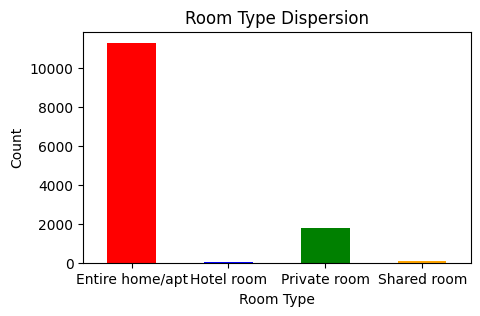

In [58]:
# Creating a dataframe with the room type count
room_types = listings['room_type'].value_counts().sort_index()

fig1 = plt.figure(figsize=(5,3))
room_types.plot(kind = 'bar', color = ['red', 'blue', 'green', 'orange'])
plt.tick_params(axis = 'x', rotation=0)
plt.title('Room Type Dispersion')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

This plot shows uss that the vast majority of rooms to rent are entire apartments, accounting for almost 6 times more the number of Privae rooms, which appears in second place.

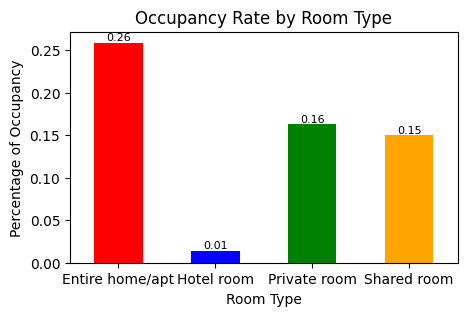

In [64]:
# Calculating the occupancy for the last year by room type
occupied_days = listings.groupby('room_type')['estimated_occupancy_l365d'].sum()

# Calculating total possible nigths per room type
possible_days = room_types * 365

# Calculating the occupancy rate
occupancy_rate = occupied_days / possible_days

fig2 = plt.figure(figsize=(5,3))
ax = occupancy_rate.plot(kind = 'bar', color = ['red', 'blue', 'green', 'orange'])
plt.tick_params(axis = 'x', rotation=0)
plt.title('Occupancy Rate by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Percentage of Occupancy')

# Add values above bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom', size = 8
    )
    
plt.show()

Even though the ´Entire home/apt´ has a largely superior number of listings when compared to the other categories, only around 25% of their availability was filled, while ´Private room' and ´Shared room´ both had a little over 15% of their occupancy filled.

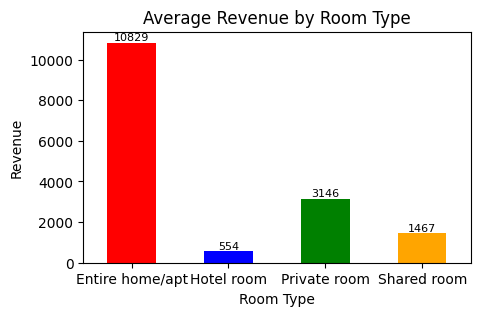

In [76]:
# Calculating the average revenue by room type
revenue_room_type = listings.groupby('room_type')['estimated_revenue_l365d'].mean()

fig3 = plt.figure(figsize=(5,3))
ax = revenue_room_type.plot(kind = 'bar', color = ['red', 'blue', 'green', 'orange'])
plt.tick_params(axis = 'x', rotation=0)
plt.title('Average Revenue by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Revenue')

# Add values above bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom', size = 8
    )
    
plt.show()

When hosting entire homes or apartments, the overall average revenue is much bigger than the other listing types.

#### 3.2 Area

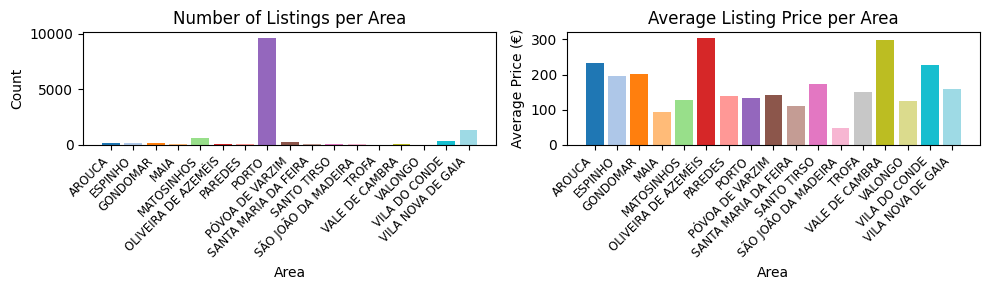

In [83]:
# Calculating variables to plot
area_listings = listings['area'].value_counts().sort_index()
price_area = listings.groupby('area')['price'].mean().sort_index()

# Defining colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(area_listings)))

fig4, ax = plt.subplots(1,2,figsize = (10,3))
# Left plot – number of listings
ax[0].bar(area_listings.index, area_listings.values, color = colors)
ax[0].set_title("Number of Listings per Area")
ax[0].set_xlabel("Area")
ax[0].set_ylabel("Count")
ax[0].tick_params(axis='x', rotation=45, labelsize = 'small')
# Aligning the labesls so they are readable
for label in ax[0].get_xticklabels():
    label.set_ha('right')

# Right plot – average price
ax[1].bar(price_area.index, price_area.values, color = colors)
ax[1].set_title("Average Listing Price per Area")
ax[1].set_xlabel("Area")
ax[1].set_ylabel("Average Price (€)")
ax[1].tick_params(axis='x', rotation=45, labelsize = 'small')
# Aligning the labesls so they are readable
for label in ax[1].get_xticklabels():
    label.set_ha('right')

plt.tight_layout()
plt.show()

Central Porto is the area with most listings by far, but when looking at the prices it's actually one of the cheapest areas.